In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv("../data/country-data.csv")
countries = df["country"]
numerical_features = df.columns[1:]

In [28]:
df.isna().sum().sum() # no missing values in data

0

In [ ]:
def style_df(df):
    """Style dataframe"""
    cell_hover = {
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    row_hover = {
        'selector': 'tr:hover',
        'props': [('background-color', '#ffffb3')]
    }
    
    numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64']).columns
    styler = df.style
    
    styler\
        .set_caption("INSERT CAPTION")\
        .background_gradient(axis="rows", cmap="Blues", subset=['child_mort', 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp'])\
        .set_table_styles([cell_hover, row_hover])\
        .format({
            "exports": "{:}%",
            "health": "{:}%",
            "imports": "{:}%",
            })\
        .highlight_max(color="red", subset=numeric_columns)\
        .highlight_min(color="lightgreen", subset=numeric_columns)\
        .bar(subset=["inflation"], align="zero", color=["red", "lightgreen"]) # bar chart
        #.highlight_quantile(q_left=0.25, q_right=0.75, subset="imports", color="red") # highlight quantiles
        #.highlight_between(left=70, right=80, subset="life_expec", color="yellow") # highlight range of values

    return styler

style_df(df)

# Plotting distribution of all features

/var/folders/r8/9_x5mqbs79gbpktlgmt3lyb40000gn/T/ipykernel_50324/1725896454.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]], color="blue")
/var/folders/r8/9_x5mqbs79gbpktlgmt3lyb40000gn/T/ipykernel_50324/1725896454.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

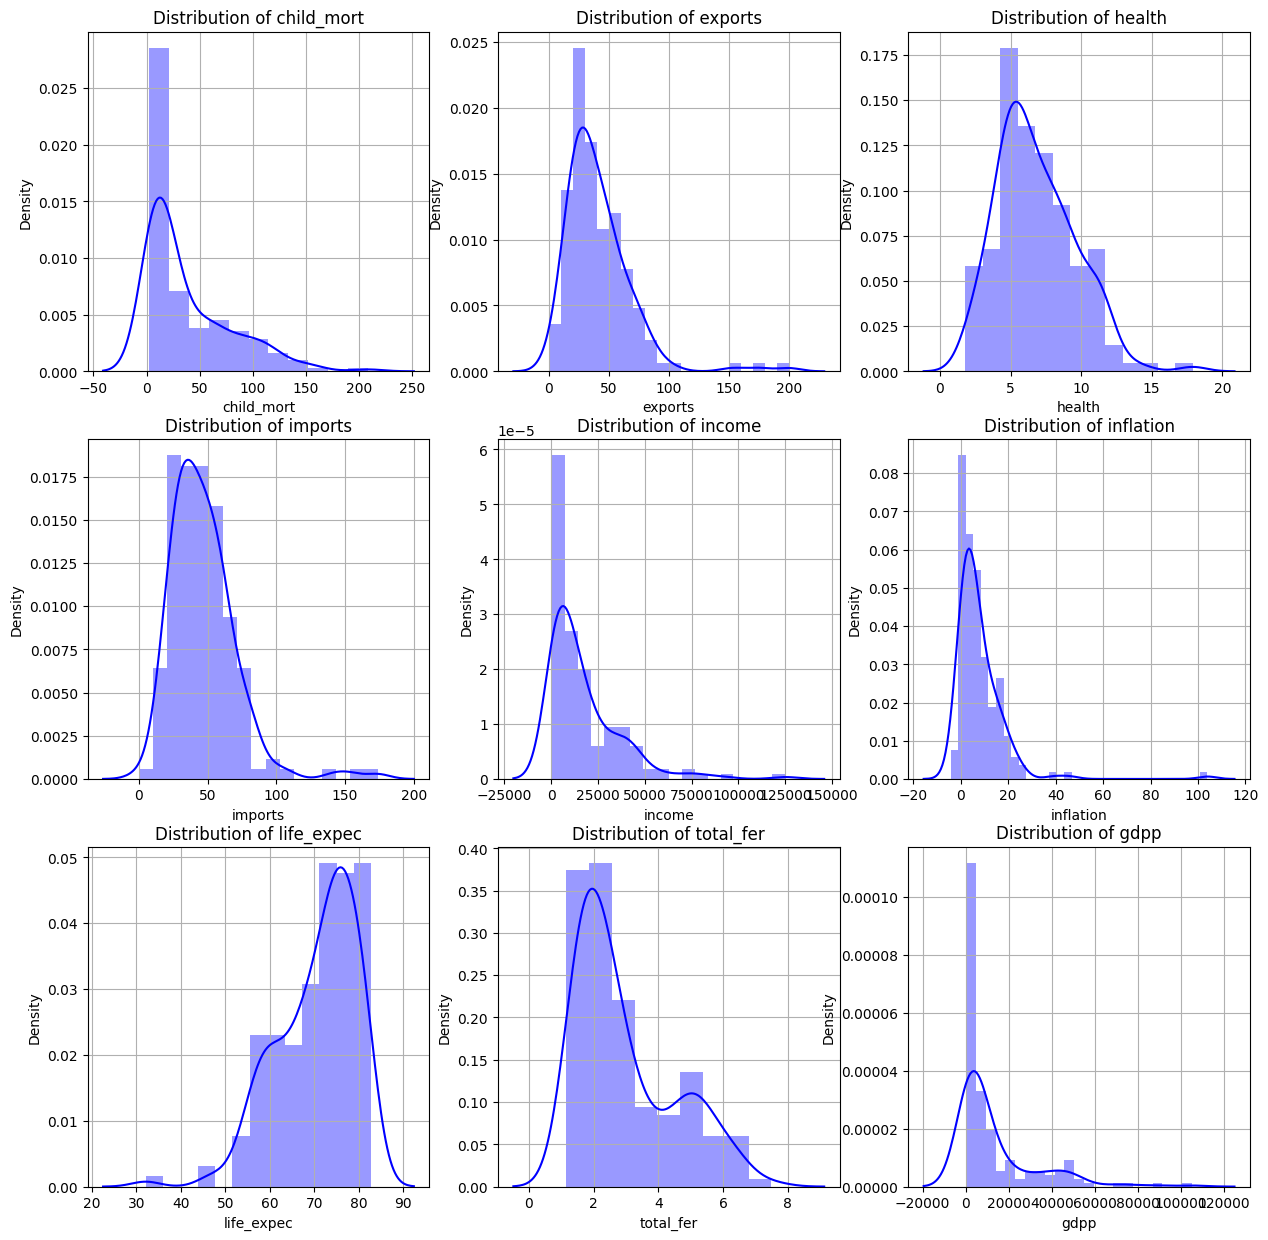

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[numerical_features[i]], color="blue")
    plt.grid()
    plt.title(f"Distribution of {numerical_features[i]}")
plt.show()